In [1]:
!pip install pandas
!pip install numpy
!pip install scipy 
!pip install scikit-learn

!pip install matplotlib

!pip install simpy.io
!pip install requests

!pip install geopy
!pip install folium


In [2]:
# data analsysis

import numpy as np 
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#import json # JSON files manipulation
#import requests # HTTP library
#from bs4 import BeautifulSoup # scraping library

# clustering algorithm
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# plotting 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# map rendering 

import folium 
from geopy.geocoders import Nominatim

import io
import requests

print('Libraries imported.')

Libraries imported.


In [3]:
data_us = pd.read_csv('uszips.csv')
data_us.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,602,18.3607,-67.1752,Aguada,PR,Puerto Rico,True,NaN,41520,523.7,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,606,18.1672,-66.9383,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,610,18.2903,-67.1224,Anasco,PR,Puerto Rico,True,NaN,29016,311.9,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


In [4]:
data_us = data_us[['zip','lat','lng','city','state_id']]
data_us.head()

,zip,lat,lng,city,state_id
0,601,18.1800,-66.7522,Adjuntas,PR
1,602,18.3607,-67.1752,Aguada,PR
2,603,18.4544,-67.1220,Aguadilla,PR
3,606,18.1672,-66.9383,Maricao,PR
4,610,18.2903,-67.1224,Anasco,PR


In [5]:
data_sea = data_us[(data_us['city'] == 'San Jose') & (data_us['state_id'] == 'CA')]
data_sea.head()

,zip,lat,lng,city,state_id
31184,95110,37.3466,-121.9099,San Jose,CA
31185,95111,37.2834,-121.8266,San Jose,CA
31186,95112,37.3444,-121.8835,San Jose,CA
31187,95113,37.3337,-121.8910,San Jose,CA
31188,95116,37.3504,-121.8526,San Jose,CA


In [6]:
data_sea.rename(columns={"zip":"Postcode", "lat": "Latitude", "lng":"Longitude", "city": "City"}, inplace = True)
data_sea.drop(['state_id'], axis = 1, inplace = True)
data_sea.head()

/Users/ruihe/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/ruihe/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postcode,Latitude,Longitude,City
31184,95110,37.3466,-121.9099,San Jose
31185,95111,37.2834,-121.8266,San Jose
31186,95112,37.3444,-121.8835,San Jose
31187,95113,37.3337,-121.8910,San Jose
31188,95116,37.3504,-121.8526,San Jose


In [7]:
data_port = data_us[(data_us['city'] == 'Orlando') & (data_us['state_id'] == 'FL')]
data_port.head()

,zip,lat,lng,city,state_id
10598,32801,28.5418,-81.3736,Orlando,FL
10599,32803,28.5549,-81.3478,Orlando,FL
10600,32804,28.5772,-81.3972,Orlando,FL
10601,32805,28.5294,-81.4058,Orlando,FL
10602,32806,28.5123,-81.3606,Orlando,FL


In [8]:
data_port.rename(columns={"zip":"Postcode", "lat": "Latitude", "lng":"Longitude", "city": "City"}, inplace = True)
data_port.drop(['state_id'], axis = 1, inplace = True)
data_port.head()

,Postcode,Latitude,Longitude,City
10598,32801,28.5418,-81.3736,Orlando
10599,32803,28.5549,-81.3478,Orlando
10600,32804,28.5772,-81.3972,Orlando
10601,32805,28.5294,-81.4058,Orlando
10602,32806,28.5123,-81.3606,Orlando


In [66]:
print('San Jose has ', data_sea.shape[0], 'zipcode areas')
print('Orlando has ', data_port.shape[0], 'zipcode areas')

San Jose has  28 zipcode areas
Orlando has  32 zipcode areas


## Creating Maps for San Jose and Orlando

In [67]:
address = 'San Jose, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_sea = location.latitude
longitude_sea = location.longitude
print('The geograpical coordinate of San Jose are {}, {}.'.format(latitude_sea, longitude_sea))

The geograpical coordinate of San Jose are 37.3361905, -121.8905833.


In [65]:
# create map of San Jose using latitude and longitude values
map_sea = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=10)

# add markers to map
for lat, lng, postcode in zip(data_sea['Latitude'], data_sea['Longitude'], data_sea['Postcode']):
    label = '{}'.format(postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sea)  
    
map_sea

In [69]:
address = 'Orlando, FL'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_port = location.latitude
longitude_port = location.longitude
print('The geograpical coordinate of Orlando are {}, {}.'.format(latitude_port, longitude_port))

The geograpical coordinate of Orlando are 28.5421097, -81.3790388.


In [13]:
# create map of Orlando using latitude and longitude values
map_port = folium.Map(location=[latitude_port, longitude_port], zoom_start=10)

# add markers to map
for lat, lng, postcode in zip(data_port['Latitude'], data_port['Longitude'], data_port['Postcode']):
    label = '{}'.format(postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_port)  
    
map_port

## Obtaining the Venue Information for Both Cities

In [14]:
# Define Foursquare Credentials and Version

#CLIENT_ID = '4JZQHBUQUTMHZC0CYXGFNHS5OCMHVVW3UB31LVWXJFL0JSIJ' # Foursquare ID
#CLIENT_SECRET = 'R13O0XDBKL0QUL1QZDY021QCSYXQHEZPDWRWZCJUBZZ55M1H' # Foursquare Secret

CLIENT_ID = 'BDMDABXRZBQ2XFZ5ZWJMF0PARADVM0OEIXU5CINQW2TL5QEQ' # Foursquare ID
CLIENT_SECRET = 'JEFQ1I2AT1SSRQGXFA0UMZPKMU43OYUZMAYKOBNIGPF0VVKN' # Foursquare Secret
VERSION = '20190623' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BDMDABXRZBQ2XFZ5ZWJMF0PARADVM0OEIXU5CINQW2TL5QEQ
CLIENT_SECRET:JEFQ1I2AT1SSRQGXFA0UMZPKMU43OYUZMAYKOBNIGPF0VVKN


In [15]:
# Create a function to explore all the neighborhoods
radius = 500
LIMIT =100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [16]:
sea_venues = getNearbyVenues(names=data_sea['Postcode'],
                                   latitudes=data_sea['Latitude'],
                                   longitudes=data_sea['Longitude'])

port_venues = getNearbyVenues(names=data_port['Postcode'],
                                   latitudes=data_port['Latitude'],
                                   longitudes=data_port['Longitude'])


In [17]:
sea_venues.shape

(285, 7)

In [18]:
port_venues.shape

(298, 7)

In [19]:
#sea_venues = sea_venues[~sea_venues['Venue Category'].str.contains(r'Restaurant|Bus|Hotel|Motel|ATM\
#  |Intersection|Moving Target|Gym|Gym / Fitness Center|Rental Car Location|Pharmacy\
#  |Shipping Store|Food & Drink Shop|Grocery Store|Juice Bar|Café|Coffee Shop|Bakery\
#  |Taco Place|Noodle House|Pizza Place|Burger Joint|Fried Chicken Joint|Breakfast Spot\
#  |Steakhouse|Deli / Bodega|Sandwich Place|ATM|BBQ JointC
#sea_venues = sea_venues[~sea_venues['Venue Category'].str.contains(r'Pool|Fish Market|\
#    Business Service|Smoke Shop|Baseball Field|Playground|Trail|Soccer Field|\
#    Sporting Goods Shop|Dog Run|Trail|Ski|Farm|Sporting Goods Shop|Moving Target')]

#sea_venues.shape

In [20]:
#port_venues = port_venues[~port_venues['Venue Category'].str.contains(r'Restaurant|Bus|Hotel|Motel|ATM\
#  |Intersection|Moving Target|Gym|Gym / Fitness Center|Rental Car Location|Pharmacy\
#  |Shipping Store|Food & Drink Shop|Grocery Store|Juice Bar|Café|Coffee Shop|Bakery\
#  |Taco Place|Noodle House|Pizza Place|Burger Joint|Fried Chicken Joint|Breakfast Spot\
#  |Steakhouse|Deli / Bodega|Sandwich Place|ATM|BBQ Joint')]

#port_venues = port_venues[~port_venues['Venue Category'].str.contains(r'Pool|Fish Market|\
#    Business Service|Smoke Shop|Baseball Field|Playground|Trail|Soccer Field|\
#    Sporting Goods Shop|Dog Run|Trail|Ski|Farm|Sporting Goods Shop|Moving Target')]

#port_venues.shape

In [21]:
# one hot encoding
sea_onehot = pd.get_dummies(sea_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sea_onehot['Postcode'] = sea_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [sea_onehot.columns[-1]] + list(sea_onehot.columns[:-1])
sea_onehot = sea_onehot[fixed_columns]

sea_onehot.shape

(285, 132)

In [22]:
# one hot encoding
port_onehot = pd.get_dummies(port_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
port_onehot['Postcode'] = port_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [port_onehot.columns[-1]] + list(port_onehot.columns[:-1])
port_onehot = port_onehot[fixed_columns]

port_onehot.shape

(298, 126)

In [23]:
sea_grouped = sea_onehot.groupby('Postcode').mean().reset_index()
sea_grouped.head()

,Postcode,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Big Box Store,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Convenience Store,Cuban Restaurant,Dance Studio,Dessert Shop,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,High School,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Locksmith,Lounge,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Moving Target,Music Store,Music Venue,Nail Salon,Opera House,Optical Shop,Paintball Field,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Thrift / Vintage Store,Track,Trail,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio,Zoo Exhibit
0,95110,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.090909,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.090909,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.090909,0.090909,0.0,0.00,0.090909,0.000000,0.00,0.0,0.090909,0.0,0.0,0.090909,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.090909,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.181818,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.090909,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
1,95111,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.333333,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.333333,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.333333,0.000000,0.0,0.00,0.00,0.00,0.0
2,95112,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.10,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.200000,0.00,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.1,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.1,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.1,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.1,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.100000,0.100000,0.0,0.00,0.00,0.00,0.0
3,95113,0.01,0.01,0.01,0.02,0.0,0.02,0.0,0.02,0.0,0.01,0.0,0.01,0.0,0.0,0.01,0.000000,0.0,0.03,0.0,0.01,0.0,0.06,0.04,0.02,0.01,0.0,0.000000,0.0

In [24]:
port_grouped = port_onehot.groupby('Postcode').mean().reset_index()
port_grouped.head()

,Postcode,Accessories Store,Adult Boutique,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Big Box Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,History Museum,Hookah Bar,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Lake,Lawyer,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Nightclub,Office,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shopping Mall,Smoothie Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tiki Bar,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Wings Joint
0,32801,0.0,0.0,0.074627,0.0,0.014925,0.000000,0.000000,0.0,0.000000,0.000000,0.014925,0.164179,0.000000,0.014925,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.014925,0.0,0.000000,0.0,0.044776,0.014925,0.014925,0.0,0.014925,0.000000,0.014925,0.0,0.000000,0.029851,0.0,0.0,0.000000,0.014925,0.000000,0.0,0.0,0.0,0.014925,0.014925,0.0,0.000000,0.000000,0.0,0.0,0.0,0.014925,0.014925,0.000000,0.000000,0.0,0.0,0.014925,0.014925,0.014925,0.0,0.014925,0.0,0.0,0.014925,0.000000,0.014925,0.0,0.0,0.000000,0.000000,0.014925,0.0,0.0,0.0,0.059701,0.0,0.000000,0.0,0.029851,0.014925,0.000000,0.029851,0.014925,0.000000,0.029851,0.014925,0.0,0.014925,0.000000,0.014925,0.0,0.000000,0.0,0.014925,0.0,0.014925,0.0,0.014925,0.000000,0.0,0.0,0.0,0.014925,0.0,0.0,0.0,0.0,0.014925,0.0,0.000000,0.000000,0.000000,0.029851,0.0,0.0,0.029851,0.0,0.014925,0.000000,0.000000,0.0,0.014925,0.000000,0.0
1,32803,0.0,0.0,0.000000,0.0,0.000000,0.027027,0.027027,0.0,0.027027,0.054054,0.027027,0.027027,0.000000,0.000000,0.027027,0.027027,0.0,0.0,0.027027,0.027027,0.027027,0.000000,0.0,0.054054,0.0,0.000000,0.054054,0.000000,0.0,0.000000,0.054054,0.000000,0.0,0.027027,0.000000,0.0,0.0,0.000000,0.000000,0.027027,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.027027,0.027027,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.027027,0.027027,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.027027,0.0,0.000000,0.000000,0.000000,0.000000,0.027027,0.027027,0.027027,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.027027,0.027027,0.027027,0.0,0.0,0.000000,0.0,0.000000,0.027027,0.054054,0.0,0.000000,0.027027,0.0
2,32805,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.

In [25]:
sea_grouped.shape

(22, 132)

In [26]:
port_grouped.shape

(26, 126)

In [27]:
num_top_venues = 10

for hood in sea_grouped['Postcode']:
    print("----"+ str(hood) +"----")
    temp = sea_grouped[sea_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----95110----
                     venue  freq
0                     Park  0.18
1  Health & Beauty Service  0.09
2                    Trail  0.09
3                  Gay Bar  0.09
4                   Garden  0.09
5         Business Service  0.09
6                      Gym  0.09
7        Convenience Store  0.09
8            Garden Center  0.09
9        Martial Arts Dojo  0.09


----95111----
                 venue  freq
0    Convenience Store  0.33
1        Shopping Mall  0.33
2          Video Store  0.33
3  American Restaurant  0.00
4          Music Store  0.00
5          Music Venue  0.00
6           Nail Salon  0.00
7          Opera House  0.00
8         Optical Shop  0.00
9      Paintball Field  0.00


----95112----
                   venue  freq
0      Convenience Store   0.2
1         Farmers Market   0.1
2             Smoke Shop   0.1
3               Pet Café   0.1
4  Vietnamese Restaurant   0.1
5            Video Store   0.1
6               Dive Bar   0.1
7            Music Store

In [28]:

for hood in port_grouped['Postcode']:
    print("----"+ str(hood) +"----")
    temp = port_grouped[port_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----32801----
                 venue  freq
0                  Bar  0.16
1  American Restaurant  0.07
2               Lounge  0.06
3         Cocktail Bar  0.04
4             Dive Bar  0.03
5                 Park  0.03
6     Sushi Restaurant  0.03
7      Thai Restaurant  0.03
8          Pizza Place  0.03
9        Movie Theater  0.03


----32803----
                   venue  freq
0     Chinese Restaurant  0.05
1          Deli / Bodega  0.05
2            Coffee Shop  0.05
3  Vietnamese Restaurant  0.05
4                 Bakery  0.05
5             Restaurant  0.05
6              Pet Store  0.03
7         Discount Store  0.03
8   Fast Food Restaurant  0.03
9          Burrito Place  0.03


----32805----
                 venue  freq
0  Rental Car Location  0.17
1    Convenience Store  0.17
2           Print Shop  0.17
3       Baseball Field  0.17
4                 Park  0.17
5               Office  0.17
6    Accessories Store  0.00
7            Nightclub  0.00
8    Recreation Center  0.00
9   

               venue  freq
0   Sculpture Garden  0.33
1        Pizza Place  0.33
2           Pharmacy  0.33
3  Accessories Store  0.00
4      Movie Theater  0.00
5  Recreation Center  0.00
6                Pub  0.00
7         Print Shop  0.00
8               Pool  0.00
9              Plaza  0.00


----32837----
                venue  freq
0  Spanish Restaurant   0.2
1          Food Truck   0.2
2   Convenience Store   0.2
3       Shopping Mall   0.2
4         Video Store   0.2
5              Office   0.0
6                Park   0.0
7           Pet Store   0.0
8            Pharmacy   0.0
9   Accessories Store   0.0


----32839----
               venue  freq
0  Accessories Store  0.17
1        Pizza Place  0.17
2      Grocery Store  0.17
3                Gym  0.17
4     Discount Store  0.17
5  Convenience Store  0.17
6                Pub  0.00
7         Print Shop  0.00
8               Pool  0.00
9             Office  0.00




## Clustering of the Postcode Areas for Both Cities

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


In [31]:
# create a new dataframe
sea_venues_sorted = pd.DataFrame(columns=columns)
sea_venues_sorted['Postcode'] = sea_grouped['Postcode']

for ind in np.arange(sea_grouped.shape[0]):
    sea_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sea_grouped.iloc[ind, :], num_top_venues)

sea_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,95110,Park,Business Service,Convenience Store,Garden,Garden Center,Martial Arts Dojo,Gay Bar,Trail,Gym,Health & Beauty Service
1,95111,Shopping Mall,Convenience Store,Video Store,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
2,95112,Convenience Store,Dive Bar,Farmers Market,Pet Café,Burger Joint,Music Store,Smoke Shop,Video Store,Vietnamese Restaurant,Fast Food Restaurant
3,95113,Sandwich Place,Mexican Restaurant,Cocktail Bar,Sushi Restaurant,Coffee Shop,Café,Hotel,Pub,Restaurant,Ice Cream Shop
4,95116,Vietnamese Restaurant,Mexican Restaurant,Golf Course,Fried Chicken Joint,Event Space,Thrift / Vintage Store,Zoo Exhibit,Football Stadium,Food Truck,Food Court


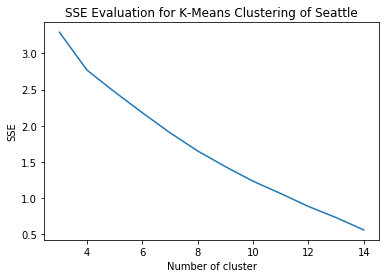

In [33]:
sea_grouped_clustering = sea_grouped.drop('Postcode', 1)

# run k-means clustering
K = 15
SSE = []
for k in range(3, K):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000).fit(sea_grouped_clustering)
    SSE.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(range(3, K)), SSE)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('SSE Evaluation for K-Means Clustering of San Jose')
plt.show()

In [36]:
kclusters_sea = 4

kmeans = KMeans(n_clusters=kclusters_sea, random_state=0, max_iter=1000).fit(sea_grouped_clustering)
labels = kmeans.labels_

sea_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sea_venues_sorted


,Cluster Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,95110,Park,Business Service,Convenience Store,Garden,Garden Center,Martial Arts Dojo,Gay Bar,Trail,Gym,Health & Beauty Service
1,0,95111,Shopping Mall,Convenience Store,Video Store,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
2,0,95112,Convenience Store,Dive Bar,Farmers Market,Pet Café,Burger Joint,Music Store,Smoke Shop,Video Store,Vietnamese Restaurant,Fast Food Restaurant
3,0,95113,Sandwich Place,Mexican Restaurant,Cocktail Bar,Sushi Restaurant,Coffee Shop,Café,Hotel,Pub,Restaurant,Ice Cream Shop
4,0,95116,Vietnamese Restaurant,Mexican Restaurant,Golf Course,Fried Chicken Joint,Event Space,Thrift / Vintage Store,Zoo Exhibit,Football Stadium,Food Truck,Food Court
5,3,95117,Intersection,Zoo Exhibit,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food,Fish & Chips Shop
6,0,95118,Indian Restaurant,Football Stadium,Video Store,Hawaiian Restaurant,Gym / Fitness Center,Baseball Field,Convenience Store,Zoo Exhibit,Flea Market,Food Truck
7,0,95121,Thrift / Vintage Store,Coffee Shop,Vietnamese Restaurant,Cajun / Creole Restaurant,Bubble Tea Shop,Ice Cream Shop,Mobile Phone Shop,Seafood Restaurant,Frozen Yogurt Shop,Korean Restaurant
8,0,95122,Mexican Restaurant,Dry Cleaner,Tea Room,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Zoo Exhibit
9,0,95123,Food,Chinese Restaurant,Water Park,Shipping Store,Lounge,Zoo Exhibit,Football Stadium,Food Truck,Food Court,Flea Market


In [37]:
sea_merged = data_sea

# merge sea_grouped with sea_data to add latitude/longitude for each neighborhood
sea_merged = sea_merged.join(sea_venues_sorted.set_index('Postcode'), on='Postcode')

sea_merged.shape
sea_merged.head()

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31184,95110,37.3466,-121.9099,San Jose,0.0,Park,Business Service,Convenience Store,Garden,Garden Center,Martial Arts Dojo,Gay Bar,Trail,Gym,Health & Beauty Service
31185,95111,37.2834,-121.8266,San Jose,0.0,Shopping Mall,Convenience Store,Video Store,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
31186,95112,37.3444,-121.8835,San Jose,0.0,Convenience Store,Dive Bar,Farmers Market,Pet Café,Burger Joint,Music Store,Smoke Shop,Video Store,Vietnamese Restaurant,Fast Food Restaurant
31187,95113,37.3337,-121.8910,San Jose,0.0,Sandwich Place,Mexican Restaurant,Cocktail Bar,Sushi Restaurant,Coffee Shop,Café,Hotel,Pub,Restaurant,Ice Cream Shop
31188,95116,37.3504,-121.8526,San Jose,0.0,Vietnamese Restaurant,Mexican Restaurant,Golf Course,Fried Chicken Joint,Event Space,Thrift / Vintage Store,Zoo Exhibit,Football Stadium,Food Truck,Food Court


In [38]:
sea_merged.dropna(inplace = True)
sea_merged

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31184,95110,37.3466,-121.9099,San Jose,0.0,Park,Business Service,Convenience Store,Garden,Garden Center,Martial Arts Dojo,Gay Bar,Trail,Gym,Health & Beauty Service
31185,95111,37.2834,-121.8266,San Jose,0.0,Shopping Mall,Convenience Store,Video Store,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
31186,95112,37.3444,-121.8835,San Jose,0.0,Convenience Store,Dive Bar,Farmers Market,Pet Café,Burger Joint,Music Store,Smoke Shop,Video Store,Vietnamese Restaurant,Fast Food Restaurant
31187,95113,37.3337,-121.8910,San Jose,0.0,Sandwich Place,Mexican Restaurant,Cocktail Bar,Sushi Restaurant,Coffee Shop,Café,Hotel,Pub,Restaurant,Ice Cream Shop
31188,95116,37.3504,-121.8526,San Jose,0.0,Vietnamese Restaurant,Mexican Restaurant,Golf Course,Fried Chicken Joint,Event Space,Thrift / Vintage Store,Zoo Exhibit,Football Stadium,Food Truck,Food Court
31189,95117,37.3113,-121.9619,San Jose,3.0,Intersection,Zoo Exhibit,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food,Fish & Chips Shop
31190,95118,37.2555,-121.8900,San Jose,0.0,Indian Restaurant,Football Stadium,Video Store,Hawaiian Restaurant,Gym / Fitness Center,Baseball Field,Convenience Store,Zoo Exhibit,Flea Market,Food Truck
31193,95121,37.3042,-121.8100,San Jose,0.0,Thrift / Vintage Store,Coffee Shop,Vietnamese Restaurant,Cajun / Creole Restaurant,Bubble Tea Shop,Ice Cream Shop,Mobile Phone Shop,Seafood Restaurant,Frozen Yogurt Shop,Korean Restaurant
31194,95122,37.3287,-121.8353,San Jose,0.0,Mexican Restaurant,Dry Cleaner,Tea Room,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Zoo Exhibit
31195,95123,37.2449,-121.8331,San Jose,0.0,Food,Chinese Restaurant,Water Park,Shipping Store,Lounge,Zoo Exhibit,Football Stadium,Food Truck,Food Court,Flea Market


In [39]:
# create map
map_clusters = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_sea)
ys = [i + x + (i*x)**2 for i in range(kclusters_sea)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sea_merged['Latitude'], sea_merged['Longitude'], sea_merged['Postcode'], sea_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
sea_merged.loc[sea_merged['Cluster Labels'] == 0, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31184,37.3466,Park,Business Service,Convenience Store,Garden,Garden Center,Martial Arts Dojo,Gay Bar,Trail,Gym,Health & Beauty Service
31185,37.2834,Shopping Mall,Convenience Store,Video Store,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
31186,37.3444,Convenience Store,Dive Bar,Farmers Market,Pet Café,Burger Joint,Music Store,Smoke Shop,Video Store,Vietnamese Restaurant,Fast Food Restaurant
31187,37.3337,Sandwich Place,Mexican Restaurant,Cocktail Bar,Sushi Restaurant,Coffee Shop,Café,Hotel,Pub,Restaurant,Ice Cream Shop
31188,37.3504,Vietnamese Restaurant,Mexican Restaurant,Golf Course,Fried Chicken Joint,Event Space,Thrift / Vintage Store,Zoo Exhibit,Football Stadium,Food Truck,Food Court
31190,37.2555,Indian Restaurant,Football Stadium,Video Store,Hawaiian Restaurant,Gym / Fitness Center,Baseball Field,Convenience Store,Zoo Exhibit,Flea Market,Food Truck
31193,37.3042,Thrift / Vintage Store,Coffee Shop,Vietnamese Restaurant,Cajun / Creole Restaurant,Bubble Tea Shop,Ice Cream Shop,Mobile Phone Shop,Seafood Restaurant,Frozen Yogurt Shop,Korean Restaurant
31194,37.3287,Mexican Restaurant,Dry Cleaner,Tea Room,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Zoo Exhibit
31195,37.2449,Food,Chinese Restaurant,Water Park,Shipping Store,Lounge,Zoo Exhibit,Football Stadium,Food Truck,Food Court,Flea Market
31196,37.2568,Sandwich Place,Juice Bar,Coffee Shop,Liquor Store,Electronics Store,Fast Food Restaurant,Farmers Market,Fish & Chips Shop,Flea Market,Frozen Yogurt Shop


In [41]:
sea_merged.loc[sea_merged['Cluster Labels'] == 1, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31199,37.3711,Resort,Zoo Exhibit,Furniture / Home Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market


In [42]:
sea_merged.loc[sea_merged['Cluster Labels'] == 2, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31210,37.2249,Park,Shopping Mall,Gym,Zoo Exhibit,Flea Market,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant
31212,37.3354,Home Service,Park,Zoo Exhibit,Flea Market,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food,Fast Food Restaurant


In [43]:
sea_merged.loc[sea_merged['Cluster Labels'] == 3, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31189,37.3113,Intersection,Zoo Exhibit,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food,Fish & Chips Shop


In [44]:
sea_merged.loc[sea_merged['Cluster Labels'] == 4, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [45]:
sea_merged.loc[sea_merged['Cluster Labels'] == 5, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]



,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [61]:
# create a new dataframe
port_venues_sorted = pd.DataFrame(columns=columns)
port_venues_sorted['Postcode'] = port_grouped['Postcode']

for ind in np.arange(port_grouped.shape[0]):
    port_venues_sorted.iloc[ind, 1:] = return_most_common_venues(port_grouped.iloc[ind, :], num_top_venues)

port_venues_sorted

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32801,Bar,American Restaurant,Lounge,Cocktail Bar,Park,Dive Bar,Movie Theater,Thai Restaurant,Sushi Restaurant,Pizza Place
1,32803,Coffee Shop,Restaurant,Vietnamese Restaurant,Bakery,Deli / Bodega,Chinese Restaurant,Intersection,Mexican Restaurant,Burger Joint,Burrito Place
2,32805,Rental Car Location,Park,Print Shop,Convenience Store,Baseball Field,Office,Food,Fish & Chips Shop,Fast Food Restaurant,Eye Doctor
3,32806,Garden Center,Eye Doctor,Salon / Barbershop,Gas Station,Lawyer,Sports Bar,Lake,Restaurant,Bakery,American Restaurant
4,32807,Baseball Field,Wings Joint,Garden Center,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
5,32808,Fast Food Restaurant,Hotel Pool,Furniture / Home Store,Food,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor
6,32809,Indian Restaurant,Restaurant,Shopping Mall,Automotive Shop,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Frozen Yogurt Shop,Eye Doctor
7,32810,Dive Bar,Restaurant,Clothing Store,Lounge,Wings Joint,Frozen Yogurt Shop,Discount Store,Donut Shop,Ethiopian Restaurant,Eye Doctor
8,32811,Rental Service,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
9,32812,Bank,Diner,Coffee Shop,Shipping Store,Salon / Barbershop,Chinese Restaurant,Office,Mexican Restaurant,Burger Joint,Grocery Store


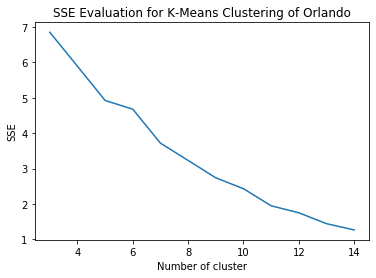

In [68]:
port_grouped_clustering = port_grouped.drop('Postcode', 1)

# run k-means clustering

SSE = []
for k in range(3, K):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000).fit(port_grouped_clustering)
    SSE.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(range(3, K)), SSE)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('SSE Evaluation for K-Means Clustering of Orlando')
plt.show()

In [63]:
kclusters_port = 5

kmeans = KMeans(n_clusters=kclusters_port, random_state=0, max_iter=1000).fit(port_grouped_clustering)
labels = kmeans.labels_
len(labels)

26

In [64]:
port_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
port_venues_sorted

,Cluster Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,32801,Bar,American Restaurant,Lounge,Cocktail Bar,Park,Dive Bar,Movie Theater,Thai Restaurant,Sushi Restaurant,Pizza Place
1,2,32803,Coffee Shop,Restaurant,Vietnamese Restaurant,Bakery,Deli / Bodega,Chinese Restaurant,Intersection,Mexican Restaurant,Burger Joint,Burrito Place
2,2,32805,Rental Car Location,Park,Print Shop,Convenience Store,Baseball Field,Office,Food,Fish & Chips Shop,Fast Food Restaurant,Eye Doctor
3,2,32806,Garden Center,Eye Doctor,Salon / Barbershop,Gas Station,Lawyer,Sports Bar,Lake,Restaurant,Bakery,American Restaurant
4,0,32807,Baseball Field,Wings Joint,Garden Center,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
5,2,32808,Fast Food Restaurant,Hotel Pool,Furniture / Home Store,Food,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor
6,2,32809,Indian Restaurant,Restaurant,Shopping Mall,Automotive Shop,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Frozen Yogurt Shop,Eye Doctor
7,2,32810,Dive Bar,Restaurant,Clothing Store,Lounge,Wings Joint,Frozen Yogurt Shop,Discount Store,Donut Shop,Ethiopian Restaurant,Eye Doctor
8,1,32811,Rental Service,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
9,2,32812,Bank,Diner,Coffee Shop,Shipping Store,Salon / Barbershop,Chinese Restaurant,Office,Mexican Restaurant,Burger Joint,Grocery Store


In [51]:
port_merged = data_port

# merge sea_grouped with sea_data to add latitude/longitude for each neighborhood
port_merged = port_merged.join(port_venues_sorted.set_index('Postcode'), on='Postcode')

port_merged.shape
port_merged



,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10598,32801,28.5418,-81.3736,Orlando,0.0,Bar,American Restaurant,Lounge,Cocktail Bar,Park,Dive Bar,Movie Theater,Thai Restaurant,Sushi Restaurant,Pizza Place
10599,32803,28.5549,-81.3478,Orlando,0.0,Coffee Shop,Restaurant,Vietnamese Restaurant,Bakery,Deli / Bodega,Chinese Restaurant,Intersection,Mexican Restaurant,Burger Joint,Burrito Place
10600,32804,28.5772,-81.3972,Orlando,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10601,32805,28.5294,-81.4058,Orlando,0.0,Rental Car Location,Park,Print Shop,Convenience Store,Baseball Field,Office,Food,Fish & Chips Shop,Fast Food Restaurant,Eye Doctor
10602,32806,28.5123,-81.3606,Orlando,0.0,Garden Center,Eye Doctor,Salon / Barbershop,Gas Station,Lawyer,Sports Bar,Lake,Restaurant,Bakery,American Restaurant
10603,32807,28.5527,-81.3009,Orlando,2.0,Baseball Field,Wings Joint,Garden Center,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
10604,32808,28.5791,-81.4432,Orlando,0.0,Fast Food Restaurant,Hotel Pool,Furniture / Home Store,Food,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor
10605,32809,28.4621,-81.3859,Orlando,0.0,Indian Restaurant,Restaurant,Shopping Mall,Automotive Shop,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Frozen Yogurt Shop,Eye Doctor
10606,32810,28.6214,-81.4294,Orlando,0.0,Dive Bar,Restaurant,Clothing Store,Lounge,Wings Joint,Frozen Yogurt Shop,Discount Store,Donut Shop,Ethiopian Restaurant,Eye Doctor
10607,32811,28.5169,-81.4446,Orlando,3.0,Rental Service,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


In [52]:
port_merged.dropna(inplace = True)
port_merged

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10598,32801,28.5418,-81.3736,Orlando,0.0,Bar,American Restaurant,Lounge,Cocktail Bar,Park,Dive Bar,Movie Theater,Thai Restaurant,Sushi Restaurant,Pizza Place
10599,32803,28.5549,-81.3478,Orlando,0.0,Coffee Shop,Restaurant,Vietnamese Restaurant,Bakery,Deli / Bodega,Chinese Restaurant,Intersection,Mexican Restaurant,Burger Joint,Burrito Place
10601,32805,28.5294,-81.4058,Orlando,0.0,Rental Car Location,Park,Print Shop,Convenience Store,Baseball Field,Office,Food,Fish & Chips Shop,Fast Food Restaurant,Eye Doctor
10602,32806,28.5123,-81.3606,Orlando,0.0,Garden Center,Eye Doctor,Salon / Barbershop,Gas Station,Lawyer,Sports Bar,Lake,Restaurant,Bakery,American Restaurant
10603,32807,28.5527,-81.3009,Orlando,2.0,Baseball Field,Wings Joint,Garden Center,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
10604,32808,28.5791,-81.4432,Orlando,0.0,Fast Food Restaurant,Hotel Pool,Furniture / Home Store,Food,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor
10605,32809,28.4621,-81.3859,Orlando,0.0,Indian Restaurant,Restaurant,Shopping Mall,Automotive Shop,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Frozen Yogurt Shop,Eye Doctor
10606,32810,28.6214,-81.4294,Orlando,0.0,Dive Bar,Restaurant,Clothing Store,Lounge,Wings Joint,Frozen Yogurt Shop,Discount Store,Donut Shop,Ethiopian Restaurant,Eye Doctor
10607,32811,28.5169,-81.4446,Orlando,3.0,Rental Service,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant
10608,32812,28.4850,-81.3285,Orlando,0.0,Bank,Diner,Coffee Shop,Shipping Store,Salon / Barbershop,Chinese Restaurant,Office,Mexican Restaurant,Burger Joint,Grocery Store


In [53]:
# create map
map_clusters = folium.Map(location=[latitude_port, longitude_port], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_port)
ys = [i + x + (i*x)**2 for i in range(kclusters_port)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(port_merged['Latitude'], port_merged['Longitude'], port_merged['Postcode'], port_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
port_merged.loc[port_merged['Cluster Labels'] == 0, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10598,28.5418,Bar,American Restaurant,Lounge,Cocktail Bar,Park,Dive Bar,Movie Theater,Thai Restaurant,Sushi Restaurant,Pizza Place
10599,28.5549,Coffee Shop,Restaurant,Vietnamese Restaurant,Bakery,Deli / Bodega,Chinese Restaurant,Intersection,Mexican Restaurant,Burger Joint,Burrito Place
10601,28.5294,Rental Car Location,Park,Print Shop,Convenience Store,Baseball Field,Office,Food,Fish & Chips Shop,Fast Food Restaurant,Eye Doctor
10602,28.5123,Garden Center,Eye Doctor,Salon / Barbershop,Gas Station,Lawyer,Sports Bar,Lake,Restaurant,Bakery,American Restaurant
10604,28.5791,Fast Food Restaurant,Hotel Pool,Furniture / Home Store,Food,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor
10605,28.4621,Indian Restaurant,Restaurant,Shopping Mall,Automotive Shop,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Frozen Yogurt Shop,Eye Doctor
10606,28.6214,Dive Bar,Restaurant,Clothing Store,Lounge,Wings Joint,Frozen Yogurt Shop,Discount Store,Donut Shop,Ethiopian Restaurant,Eye Doctor
10608,28.4850,Bank,Diner,Coffee Shop,Shipping Store,Salon / Barbershop,Chinese Restaurant,Office,Mexican Restaurant,Burger Joint,Grocery Store
10609,28.5702,Pool,Park,Wings Joint,Pharmacy,Scenic Lookout,Sandwich Place,Burger Joint,Restaurant,Candy Store,Pet Store
10611,28.5865,Recreation Center,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


In [55]:
port_merged.loc[port_merged['Cluster Labels'] == 1, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10618,28.5882,Plaza,Wings Joint,Furniture / Home Store,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


In [56]:
port_merged.loc[port_merged['Cluster Labels'] == 2, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10603,28.5527,Baseball Field,Wings Joint,Garden Center,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


In [57]:
port_merged.loc[port_merged['Cluster Labels'] == 3, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10607,28.5169,Rental Service,Furniture / Home Store,Diner,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


In [58]:
port_merged.loc[port_merged['Cluster Labels'] == 4, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10620,28.5283,Gym Pool,Lingerie Store,Wings Joint,Furniture / Home Store,Discount Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Eye Doctor,Farmers Market
